In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

import warnings
# Filter or suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing the dataset


In [2]:
raw_reviews = pd.read_csv('F:/Musical_instruments_reviews.csv')
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(raw_reviews.shape))
print (raw_reviews.info())

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


In [3]:
raw_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  unixReviewTime   reviewTime  
0                                   good      1393545600  02 28, 2014  
1                                   Jake      1363392000  03 16, 2013  
2                   It Does The Job Well      1377648000  08 28, 2013  
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4  No more pops when I record my vocals.      1392940800  02 21, 2014

## Dataset Details
**This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time**

**Description of columns in the file:**

* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

<a id="section-two"></a>
# Preprocessing and cleaning


## Handling NaN values

Let's check for null values

In [4]:
#Creating a copy
process_reviews=raw_reviews.copy()

#Checking for null values
process_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [5]:
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

## Concatenating review text and summary
Let's combine review text and summary column. The sentiments won't be contradicting in nature. 

In [6]:
process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

## Creating 'sentiment' column
**If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment**

In [7]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

In [8]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [9]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head(10)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   
5  A2A039TZMZHH9Y  B00004Y2UT   
6  A1UPZM995ZAH90  B00004Y2UT   
7   AJNFQI3YR6XJ5  B00004Y2UT   
8  A3M1PLEYNDEYO8  B00004Y2UT   
9   AMNTZU1YQN1TH  B00004Y2UT   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   
5                               Bill Lewey "blewey"    [0, 0]      5.0   
6                                             Brian    [0, 0]      5.0   
7                                 Fender Guy "Rick"    [0, 0]      3.0   
8                                   G. Thomas "Tom"    [0, 0]      5.0   
9                                       Kurt Robair    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   
5      1356048000  12 21, 2012   
6      1390089600  01 19, 2014   
7      1353024000  11 16, 2012   
8      1215302400   07 6, 2008   
9      1389139200   01 8, 2014   

                                             reviews sentiment  
0  Not much to write about here, but it does exac...  Positive  
1  The product does exactly as it should and is q...  Positive  
2  The primary job of this device is to block the...  Positive  
3  Nice windscreen protects my MXL mic and preven...  Positive  
4  This pop filter is great. It looks and perform...  Positive  
5  So good that I bought another one.  Love the h...  Positive  
6  I have used monster cables for years, and with...  Positive  
7  I now use this cable to run from the output of...   Neutral  
8  Perfect for my Epiphone Sheraton II.  Monster ...  Positive  
9  Monster makes the best cables and a lifetime w...  Positive

In [10]:
process_reviews.tail(10)

reviewerID        asin                     reviewerName helpful  \
10251  A3M1PLEYNDEYO8  B00JBIVXGC                  G. Thomas "Tom"  [0, 0]   
10252  A1SD1C8XK3Z3V1  B00JBIVXGC  guitfiddleblue "guitfiddleblue"  [0, 0]   
10253  A2VRAT69JDAD3W  B00JBIVXGC       Jason Whitt "Whittmeister"  [0, 0]   
10254  A306NASGVUDFKF  B00JBIVXGC       Jeffrey E "jeffinaustintx"  [0, 0]   
10255  A1TSKKBNV38E8Y  B00JBIVXGC      K. Harriger "K.R. Harriger"  [0, 0]   
10256  A14B2YH83ZXMPP  B00JBIVXGC                  Lonnie M. Adams  [0, 0]   
10257   A1RPTVW5VEOSI  B00JBIVXGC               Michael J. Edelman  [0, 0]   
10258   AWCJ12KBO5VII  B00JBIVXGC                 Michael L. Knapp  [0, 0]   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC          Rick Langdon "Scriptor"  [0, 0]   
10260  A2WA8TDCTGUADI  B00JBIVXGC                  TheTerrorBeyond  [0, 0]   

       overall  unixReviewTime   reviewTime  \
10251      5.0      1404172800   07 1, 2014   
10252      5.0      1404086400  06 30, 2014   
10253      4.0      1405900800  07 21, 2014   
10254      5.0      1404432000   07 4, 2014   
10255      3.0      1403654400  06 25, 2014   
10256      5.0      1405814400  07 20, 2014   
10257      5.0      1404259200   07 2, 2014   
10258      4.0      1405987200  07 22, 2014   
10259      4.0      1404172800   07 1, 2014   
10260      4.0      1405468800  07 16, 2014   

                                                 reviews sentiment  
10251  True to phosphor bronze these strings have a m...  Positive  
10252  I've used Elixirs for about five years now. Th...  Positive  
10253  I'm a D'Addario man myself, but hey free is fr...  Positive  
10254  I really like these strings.  While they are n...  Positive  
10255  I have lots of friends who play these strings....   Neutral  
10256  Great, just as expected.  Thank to all.Five Stars  Positive  
10257  I've been thinking about trying the Nanoweb st...  Positive  
10258  I have tried coated strings in the past ( incl...  Positive  
10259  Well, MADE by Elixir and DEVELOPED with Taylor...  Positive  
10260  These strings are really quite good, but I wou...  Positive

In [11]:
process_reviews['sentiment'].value_counts()

sentiment
Positive    9022
Neutral      772
Negative     467
Name: count, dtype: int64

## Handling time column

In [12]:
# new data frame which has date and year
new = process_reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
process_reviews["date"]= new[0] 
  
# making separate year column from new data frame 
process_reviews["year"]= new[1] 

process_reviews=process_reviews.drop(['reviewTime'], axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  sentiment   date   year  
0  Positive  02 28   2014  
1  Positive  03 16   2013  
2  Positive  08 28   2013  
3  Positive  02 14   2014  
4  Positive  02 21   2014

In [13]:
# Splitting the date 
new1 = process_reviews["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
process_reviews["month"]= new1[0] 
  
# adding day to the main dataset 
process_reviews["day"]= new1[1] 

process_reviews=process_reviews.drop(['date'], axis=1)
process_reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  sentiment   year month day  
0  Positive   2014    02  28  
1  Positive   2013    03  16  
2  Positive   2013    08  28  
3  Positive   2014    02  14  
4  Positive   2014    02  21

## Finding the helpfulness of the review


In [14]:
# Splitting the dataset based on comma and square bracket 
new1 = process_reviews["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)


# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
process_reviews['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
process_reviews=process_reviews.drop(['helpful'], axis=1)

In [15]:
process_reviews.head(10)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   
5  A2A039TZMZHH9Y  B00004Y2UT   
6  A1UPZM995ZAH90  B00004Y2UT   
7   AJNFQI3YR6XJ5  B00004Y2UT   
8  A3M1PLEYNDEYO8  B00004Y2UT   
9   AMNTZU1YQN1TH  B00004Y2UT   

                                       reviewerName  overall  unixReviewTime  \
0  cassandra tu "Yeah, well, that's just like, u...      5.0      1393545600   
1                                              Jake      5.0      1363392000   
2                     Rick Bennette "Rick Bennette"      5.0      1377648000   
3                         RustyBill "Sunday Rocker"      5.0      1392336000   
4                                     SEAN MASLANKA      5.0      1392940800   
5                               Bill Lewey "blewey"      5.0      1356048000   
6                                             Brian      5.0      1390089600   
7                                 Fender Guy "Rick"      3.0      1353024000   
8                                   G. Thomas "Tom"      5.0      1215302400   
9                                       Kurt Robair      5.0      1389139200   

                                             reviews sentiment   year month  \
0  Not much to write about here, but it does exac...  Positive   2014    02   
1  The product does exactly as it should and is q...  Positive   2013    03   
2  The primary job of this device is to block the...  Positive   2013    08   
3  Nice windscreen protects my MXL mic and preven...  Positive   2014    02   
4  This pop filter is great. It looks and perform...  Positive   2014    02   
5  So good that I bought another one.  Love the h...  Positive   2012    12   
6  I have used monster cables for years, and with...  Positive   2014    01   
7  I now use this cable to run from the output of...   Neutral   2012    11   
8  Perfect for my Epiphone Sheraton II.  Monster ...  Positive   2008    07   
9  Monster makes the best cables and a lifetime w...  Positive   2014    01   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00  
5  21          0.00  
6  19          0.00  
7  16          0.00  
8   6          0.00  
9   8          0.00

In [16]:
process_reviews.tail(10)

reviewerID        asin                     reviewerName  overall  \
10251  A3M1PLEYNDEYO8  B00JBIVXGC                  G. Thomas "Tom"      5.0   
10252  A1SD1C8XK3Z3V1  B00JBIVXGC  guitfiddleblue "guitfiddleblue"      5.0   
10253  A2VRAT69JDAD3W  B00JBIVXGC       Jason Whitt "Whittmeister"      4.0   
10254  A306NASGVUDFKF  B00JBIVXGC       Jeffrey E "jeffinaustintx"      5.0   
10255  A1TSKKBNV38E8Y  B00JBIVXGC      K. Harriger "K.R. Harriger"      3.0   
10256  A14B2YH83ZXMPP  B00JBIVXGC                  Lonnie M. Adams      5.0   
10257   A1RPTVW5VEOSI  B00JBIVXGC               Michael J. Edelman      5.0   
10258   AWCJ12KBO5VII  B00JBIVXGC                 Michael L. Knapp      4.0   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC          Rick Langdon "Scriptor"      4.0   
10260  A2WA8TDCTGUADI  B00JBIVXGC                  TheTerrorBeyond      4.0   

       unixReviewTime                                            reviews  \
10251      1404172800  True to phosphor bronze these strings have a m...   
10252      1404086400  I've used Elixirs for about five years now. Th...   
10253      1405900800  I'm a D'Addario man myself, but hey free is fr...   
10254      1404432000  I really like these strings.  While they are n...   
10255      1403654400  I have lots of friends who play these strings....   
10256      1405814400  Great, just as expected.  Thank to all.Five Stars   
10257      1404259200  I've been thinking about trying the Nanoweb st...   
10258      1405987200  I have tried coated strings in the past ( incl...   
10259      1404172800  Well, MADE by Elixir and DEVELOPED with Taylor...   
10260      1405468800  These strings are really quite good, but I wou...   

      sentiment   year month day  helpful_rate  
10251  Positive   2014    07   1           0.0  
10252  Positive   2014    06  30           0.0  
10253  Positive   2014    07  21           0.0  
10254  Positive   2014    07   4           0.0  
10255   Neutral   2014    06  25           0.0  
10256  Positive   2014    07  20           0.0  
10257  Positive   2014    07   2           0.0  
10258  Positive   2014    07  22           0.0  
10259  Positive   2014    07   1           0.0  
10260  Positive   2014    07  16           0.0

**Successfully created the helpful_rate column through processing steps. Let's look at the values**

In [17]:
process_reviews['helpful_rate'].value_counts()

helpful_rate
0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: count, Length: 65, dtype: int64

0.00 indicates that the review hasn't been much helpful and 1.00 indicates that the review has been very helpful.

## Review text-Punctuation Cleaning


In [18]:
#Removing unnecessary columns
process_reviews=process_reviews.drop(['reviewerName','unixReviewTime'], axis=1)
#Creating a copy 
clean_reviews=process_reviews.copy()

In [19]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [20]:
process_reviews['reviews']=process_reviews['reviews'].apply(lambda x:review_cleaning(x))
process_reviews.head(10)

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   
5  A2A039TZMZHH9Y  B00004Y2UT      5.0   
6  A1UPZM995ZAH90  B00004Y2UT      5.0   
7   AJNFQI3YR6XJ5  B00004Y2UT      3.0   
8  A3M1PLEYNDEYO8  B00004Y2UT      5.0   
9   AMNTZU1YQN1TH  B00004Y2UT      5.0   

                                             reviews sentiment   year month  \
0  not much to write about here but it does exact...  Positive   2014    02   
1  the product does exactly as it should and is q...  Positive   2013    03   
2  the primary job of this device is to block the...  Positive   2013    08   
3  nice windscreen protects my mxl mic and preven...  Positive   2014    02   
4  this pop filter is great it looks and performs...  Positive   2014    02   
5  so good that i bought another one  love the he...  Positive   2012    12   
6  i have used monster cables for years and with ...  Positive   2014    01   
7  i now use this cable to run from the output of...   Neutral   2012    11   
8  perfect for my epiphone sheraton ii  monster c...  Positive   2008    07   
9  monster makes the best cables and a lifetime w...  Positive   2014    01   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00  
5  21          0.00  
6  19          0.00  
7  16          0.00  
8   6          0.00  
9   8          0.00

Removed all punctuation in our review column.

## Review text-Stop words
General nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [21]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [22]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head(10)

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   
5  A2A039TZMZHH9Y  B00004Y2UT      5.0   
6  A1UPZM995ZAH90  B00004Y2UT      5.0   
7   AJNFQI3YR6XJ5  B00004Y2UT      3.0   
8  A3M1PLEYNDEYO8  B00004Y2UT      5.0   
9   AMNTZU1YQN1TH  B00004Y2UT      5.0   

                                             reviews sentiment   year month  \
0  not much write but exactly supposed filters po...  Positive   2014    02   
1  product exactly quite affordablei not realized...  Positive   2013    03   
2  primary job device block breath would otherwis...  Positive   2013    08   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014    02   
4  pop filter great looks performs like studio fi...  Positive   2014    02   
5  good bought another one love heavy cord gold c...  Positive   2012    12   
6  used monster cables years good reason lifetime...  Positive   2014    01   
7  use cable run output pedal chain input fender ...   Neutral   2012    11   
8  perfect epiphone sheraton ii monster cables we...  Positive   2008    07   
9  monster makes best cables lifetime warranty do...  Positive   2014    01   

  day  helpful_rate  
0  28          0.00  
1  16          0.93  
2  28          1.00  
3  14          0.00  
4  21          0.00  
5  21          0.00  
6  19          0.00  
7  16          0.00  
8   6          0.00  
9   8          0.00

In [23]:
process_reviews.tail(10)

reviewerID        asin  overall  \
10251  A3M1PLEYNDEYO8  B00JBIVXGC      5.0   
10252  A1SD1C8XK3Z3V1  B00JBIVXGC      5.0   
10253  A2VRAT69JDAD3W  B00JBIVXGC      4.0   
10254  A306NASGVUDFKF  B00JBIVXGC      5.0   
10255  A1TSKKBNV38E8Y  B00JBIVXGC      3.0   
10256  A14B2YH83ZXMPP  B00JBIVXGC      5.0   
10257   A1RPTVW5VEOSI  B00JBIVXGC      5.0   
10258   AWCJ12KBO5VII  B00JBIVXGC      4.0   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC      4.0   
10260  A2WA8TDCTGUADI  B00JBIVXGC      4.0   

                                                 reviews sentiment   year  \
10251  true phosphor bronze strings mellow full sound...  Positive   2014   
10252  ive used elixirs five years set offers great s...  Positive   2014   
10253  im daddario man but hey free free jumped chanc...  Positive   2014   
10254  really like strings not quite bright sounding ...  Positive   2014   
10255  lots friends play strings love string like the...   Neutral   2014   
10256                 great expected thank allfive stars  Positive   2014   
10257  ive thinking trying nanoweb strings but bit pu...  Positive   2014   
10258  tried coated strings past including elixirs ne...  Positive   2014   
10259  well made elixir developed taylor guitars stri...  Positive   2014   
10260  strings really quite good but wouldnt call per...  Positive   2014   

      month day  helpful_rate  
10251    07   1           0.0  
10252    06  30           0.0  
10253    07  21           0.0  
10254    07   4           0.0  
10255    06  25           0.0  
10256    07  20           0.0  
10257    07   2           0.0  
10258    07  22           0.0  
10259    07   1           0.0  
10260    07  16           0.0

Removed all the stop words in the review column


# Story Generation and Visualization from reviews


## Sentiments vs Helpful rate


In [24]:
pd.DataFrame(process_reviews.groupby('sentiment')['helpful_rate'].mean())

helpful_rate
sentiment              
Negative       0.307559
Neutral        0.275687
Positive       0.260505

From the table we can see that the mean of of helpful rate is higher for any negative reviews than neutral and positive reviews. These mean value might have been influenced by the 0 values in helpful rates. Lets check how it is distributed through violin plot.

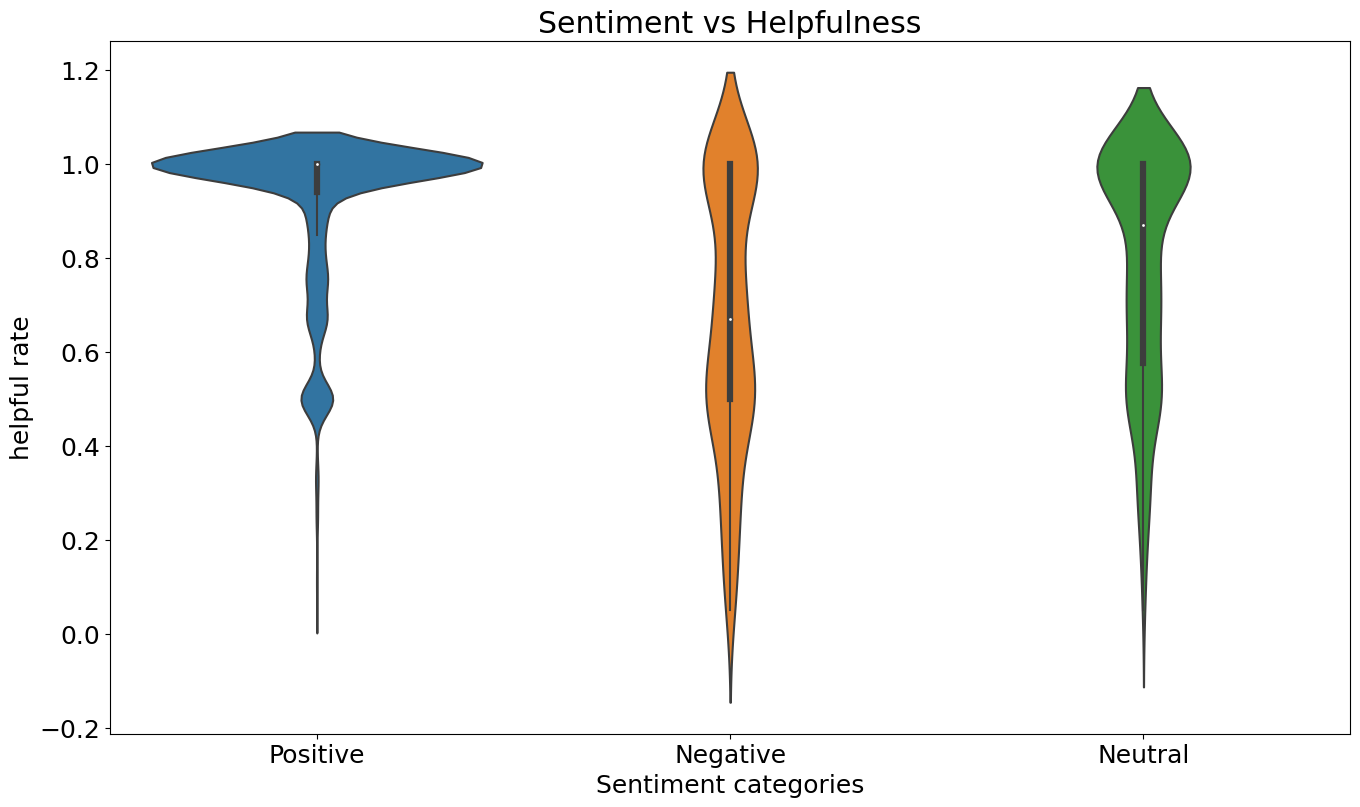

In [25]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(process_reviews, columns = ['sentiment', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["sentiment"], y=senti_help["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()

**Insights:** <br>

From the plot we can declare that more number of positive reviews are having high helpful rate. We got deceived by the mean value, it's better to look at a plot rather than taking some measures of central tendency under such situation. Our first assumption is correct.

## Year vs Sentiment count
In this block we will see how many reviews were posted based on sentiments in each year from 2004 to 2014.

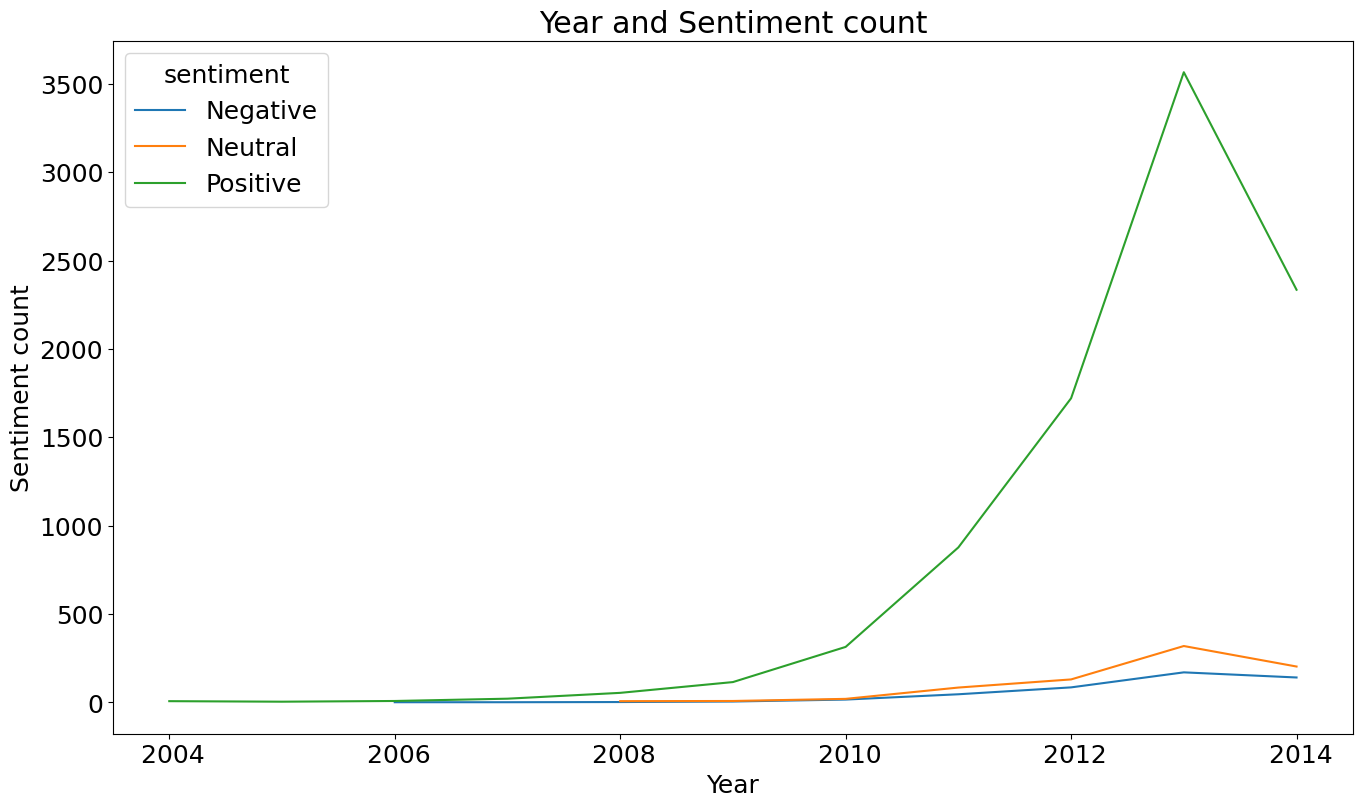

In [26]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

**Insights:** <br>
From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews. Our second assumption is wrong!

## Day of month vs Reviews count
Checking if there are any relationship between reviews and day of month**

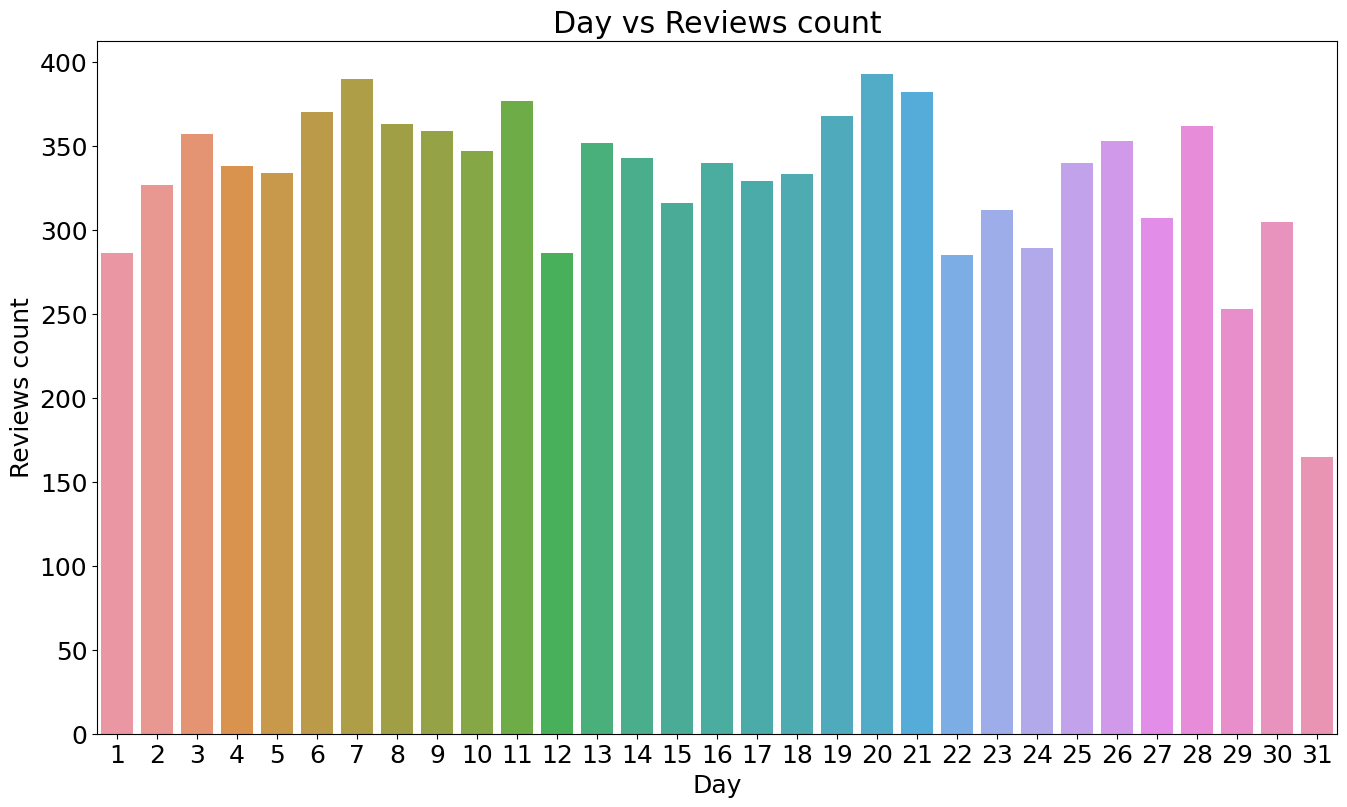

In [27]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

**Insights:** <br>
The review counts are more or less uniformly distributed.There isn't much variance between the days. But there is a huge drop at the end of month. Our third assumption is wrong!

## Creating few more features for text analysis
**Creating polarity, review length and word count**

**Polarity:** **Used Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity**

**Review length:** **Length of the review which includes each letters and spaces**

**Word length:** **This measures how many words are there in review**

In [28]:
process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [29]:
process_reviews.head(10)

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   
5  A2A039TZMZHH9Y  B00004Y2UT      5.0   
6  A1UPZM995ZAH90  B00004Y2UT      5.0   
7   AJNFQI3YR6XJ5  B00004Y2UT      3.0   
8  A3M1PLEYNDEYO8  B00004Y2UT      5.0   
9   AMNTZU1YQN1TH  B00004Y2UT      5.0   

                                             reviews sentiment   year month  \
0  not much write but exactly supposed filters po...  Positive   2014    02   
1  product exactly quite affordablei not realized...  Positive   2013    03   
2  primary job device block breath would otherwis...  Positive   2013    08   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014    02   
4  pop filter great looks performs like studio fi...  Positive   2014    02   
5  good bought another one love heavy cord gold c...  Positive   2012    12   
6  used monster cables years good reason lifetime...  Positive   2014    01   
7  use cable run output pedal chain input fender ...   Neutral   2012    11   
8  perfect epiphone sheraton ii monster cables we...  Positive   2008    07   
9  monster makes best cables lifetime warranty do...  Positive   2014    01   

  day  helpful_rate  polarity  review_len  word_count  
0  28          0.00  0.250000         162          25  
1  16          0.93  0.014286         356          55  
2  28          1.00  0.167500         315          48  
3  14          0.00  0.333333         169          22  
4  21          0.00  0.800000         136          21  
5  21          0.00  0.318750         180          29  
6  19          0.00  0.250000         162          24  
7  16          0.00  0.017652         538          87  
8   6          0.00  0.500000         127          18  
9   8          0.00  0.330000         178          28

In [30]:
process_reviews.tail(10)

reviewerID        asin  overall  \
10251  A3M1PLEYNDEYO8  B00JBIVXGC      5.0   
10252  A1SD1C8XK3Z3V1  B00JBIVXGC      5.0   
10253  A2VRAT69JDAD3W  B00JBIVXGC      4.0   
10254  A306NASGVUDFKF  B00JBIVXGC      5.0   
10255  A1TSKKBNV38E8Y  B00JBIVXGC      3.0   
10256  A14B2YH83ZXMPP  B00JBIVXGC      5.0   
10257   A1RPTVW5VEOSI  B00JBIVXGC      5.0   
10258   AWCJ12KBO5VII  B00JBIVXGC      4.0   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC      4.0   
10260  A2WA8TDCTGUADI  B00JBIVXGC      4.0   

                                                 reviews sentiment   year  \
10251  true phosphor bronze strings mellow full sound...  Positive   2014   
10252  ive used elixirs five years set offers great s...  Positive   2014   
10253  im daddario man but hey free free jumped chanc...  Positive   2014   
10254  really like strings not quite bright sounding ...  Positive   2014   
10255  lots friends play strings love string like the...   Neutral   2014   
10256                 great expected thank allfive stars  Positive   2014   
10257  ive thinking trying nanoweb strings but bit pu...  Positive   2014   
10258  tried coated strings past including elixirs ne...  Positive   2014   
10259  well made elixir developed taylor guitars stri...  Positive   2014   
10260  strings really quite good but wouldnt call per...  Positive   2014   

      month day  helpful_rate  polarity  review_len  word_count  
10251    07   1           0.0  0.298810         401          66  
10252    06  30           0.0  0.405882         495          72  
10253    07  21           0.0  0.185714         368          58  
10254    07   4           0.0  0.234127         315          49  
10255    06  25           0.0  0.335198        1541         229  
10256    07  20           0.0  0.350000          34           5  
10257    07   2           0.0  0.183678        1870         291  
10258    07  22           0.0  0.316484         371          58  
10259    07   1           0.0  0.110938         981         153  
10260    07  16           0.0  0.384375         419          61

In [31]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Sentiment polarity distribution


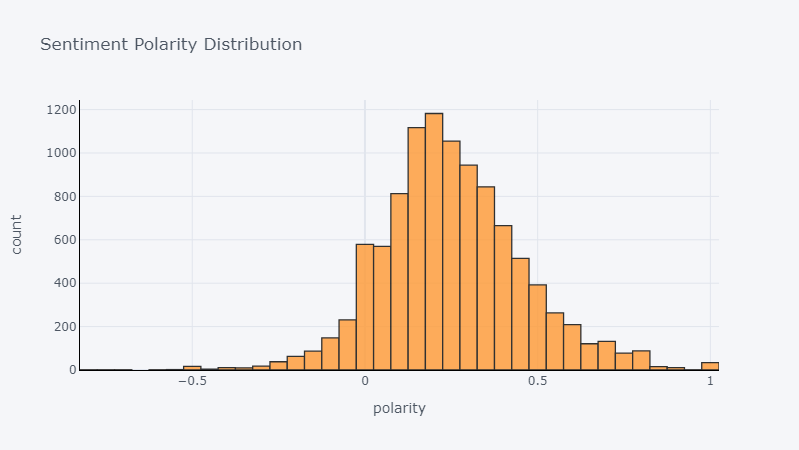

In [32]:
process_reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

**Insights:**
* **We have a lot of positive polarities compared to the negative polarities**
* **This polarity distributions assures the number of positive reviews we had**
* **We can say that this polarity is a normally distributed but not standard normal**


## Review Rating Distribution
Let's check out how overall ratings are distributed.

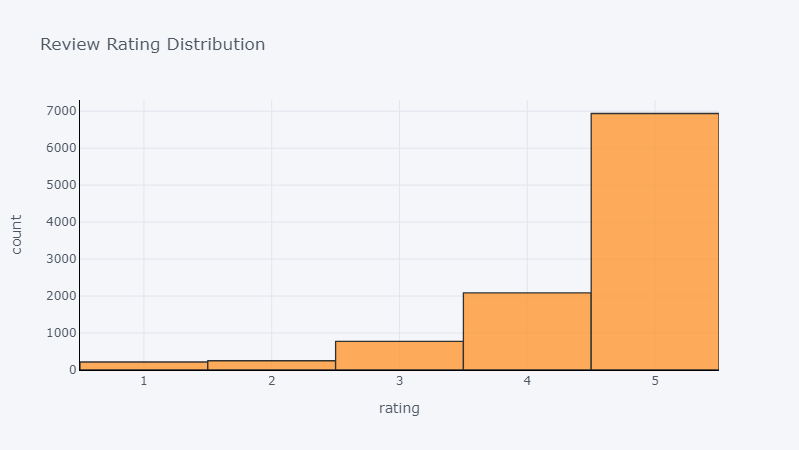

In [33]:
process_reviews['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

We have a large number of 5 ratings(nearly 7k) followed by 4,3,2,1. It's linear in nature.

## Review Text Length Distribution


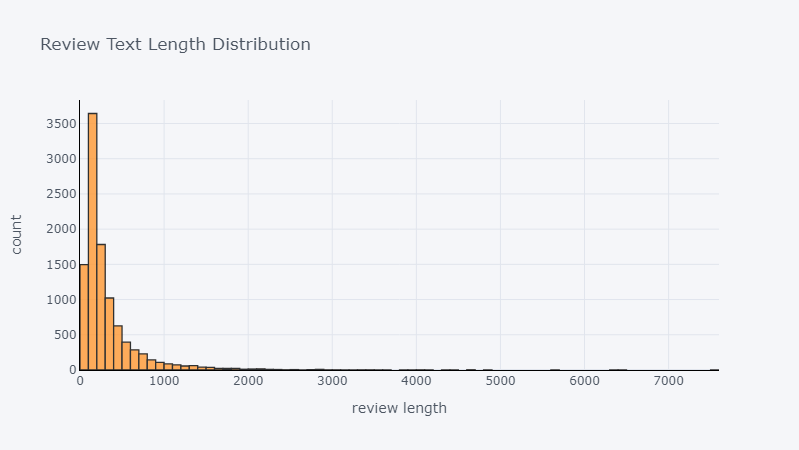

In [34]:
process_reviews['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

**We have a right skewed distribution where most of the lengths falls between 0-1000**

## Review Text Word Count Distribution


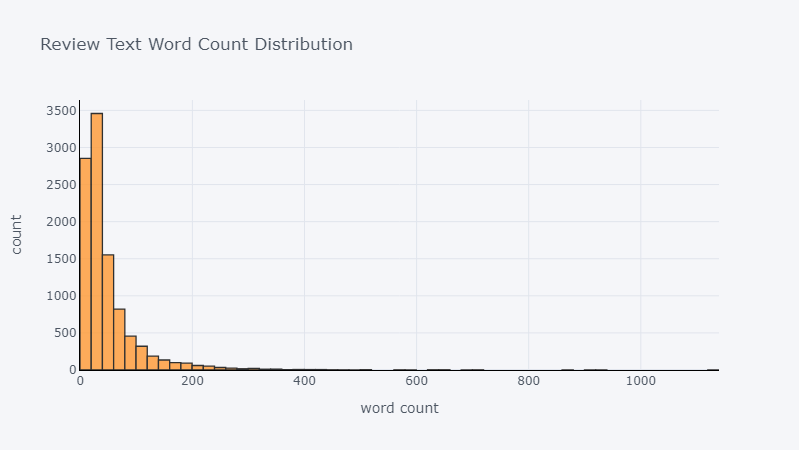

In [35]:
process_reviews['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

**We have a right skewed distribution with most of the words falling between 0-200 in a a review** 

## N-gram analysis
Using ngrams to analyse the text, based on it's sentiment.

## Monogram analysis
Plotting most frequent one word in reviews based on sentiments.

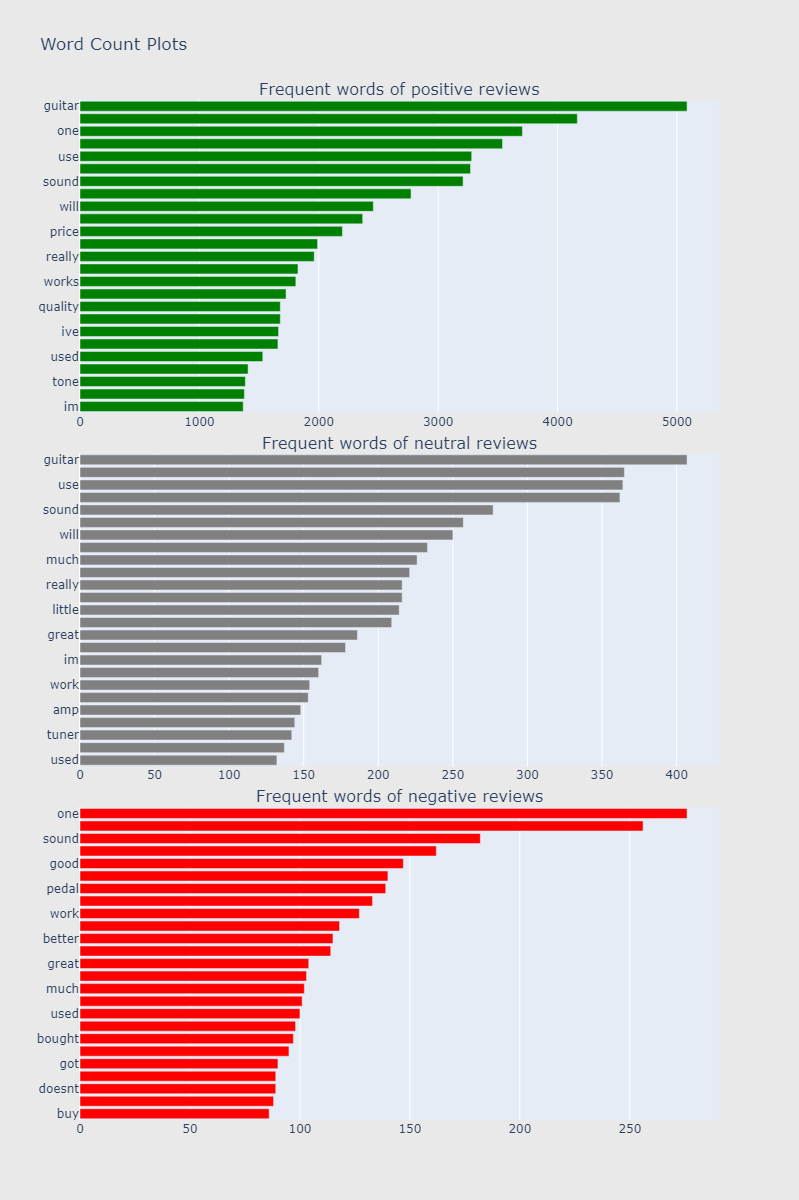

In [36]:
#Filtering data
review_pos = process_reviews[process_reviews["sentiment"]=='Positive'].dropna()
review_neu = process_reviews[process_reviews["sentiment"]=='Neutral'].dropna()
review_neg = process_reviews[process_reviews["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

Words doen't match with the sentiment except few. Through monogram we can't judge a sendiment based on one word. So let's try with frequent two words.

## Bigram analysis
Plotting most frequent two words in reviews based on sentiments.

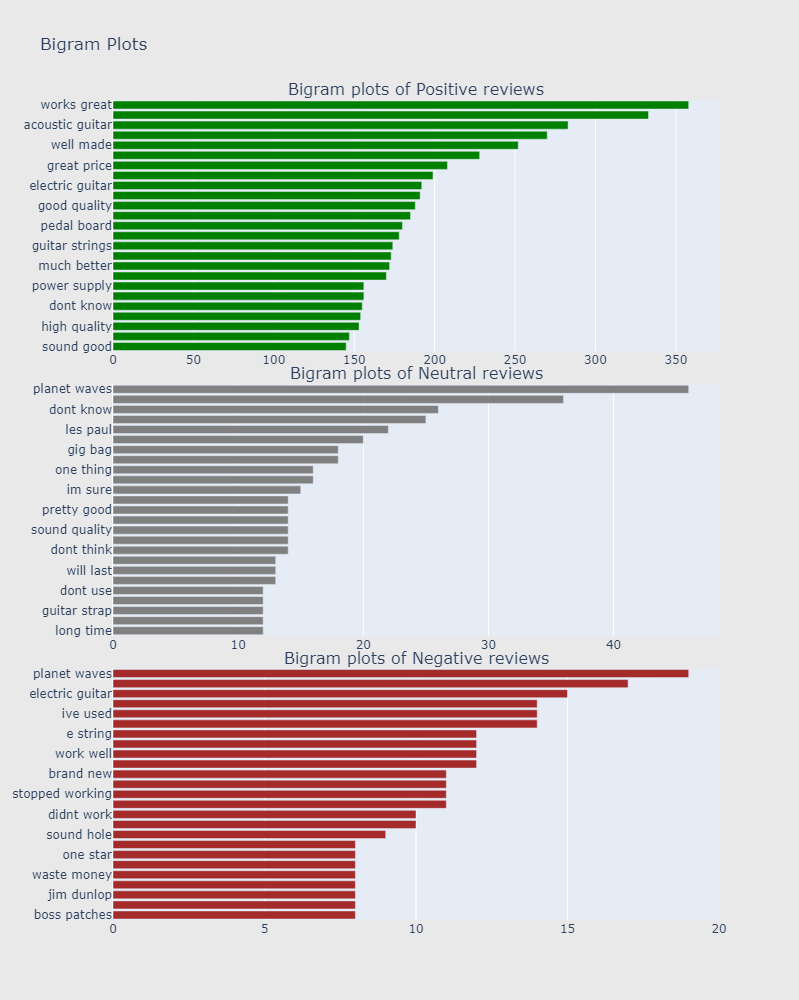

In [37]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

**Here we can get a clear idea about the sentiments from the bi-words**

## Trigram analysis
Plotting most frequent three words in reviews based on sentiments.

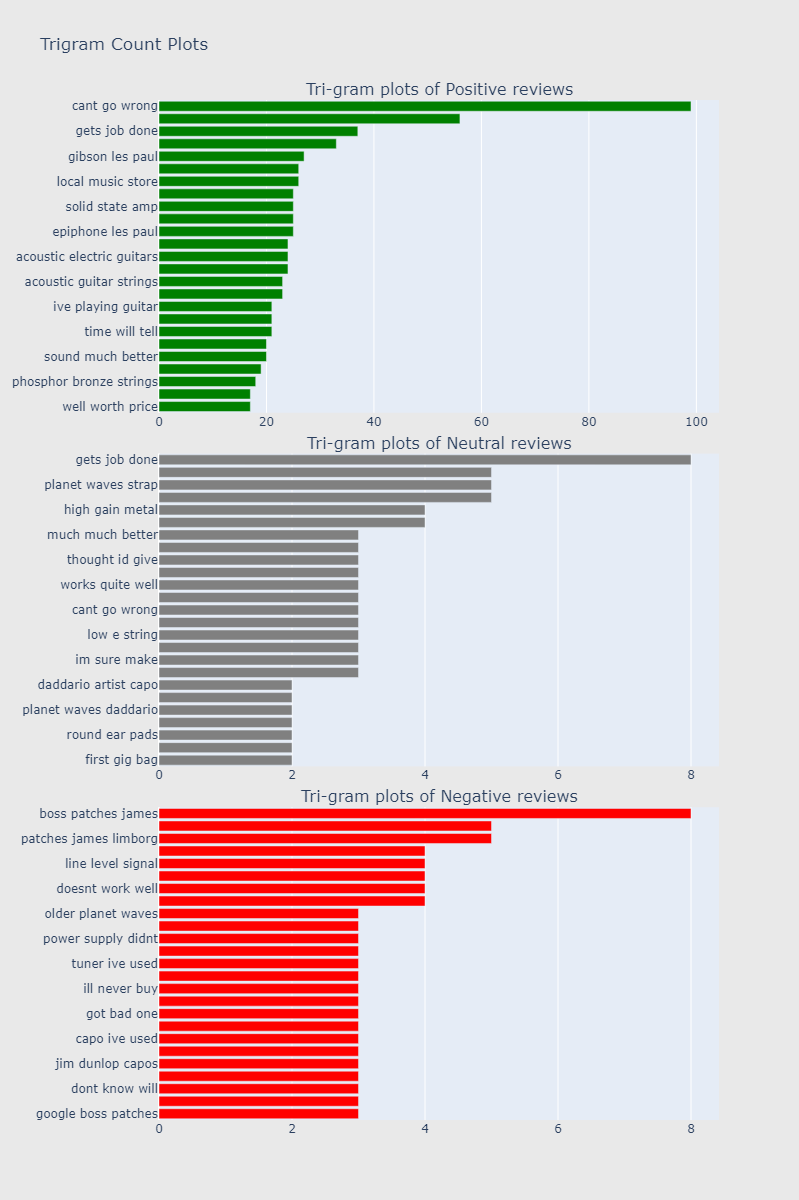

In [38]:
## Get the bar chart from positive reviews ##
for sent in review_pos["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')


Completed ngram analysis. Let's look at wordcloud.

## Wordcloud-Positive reviews



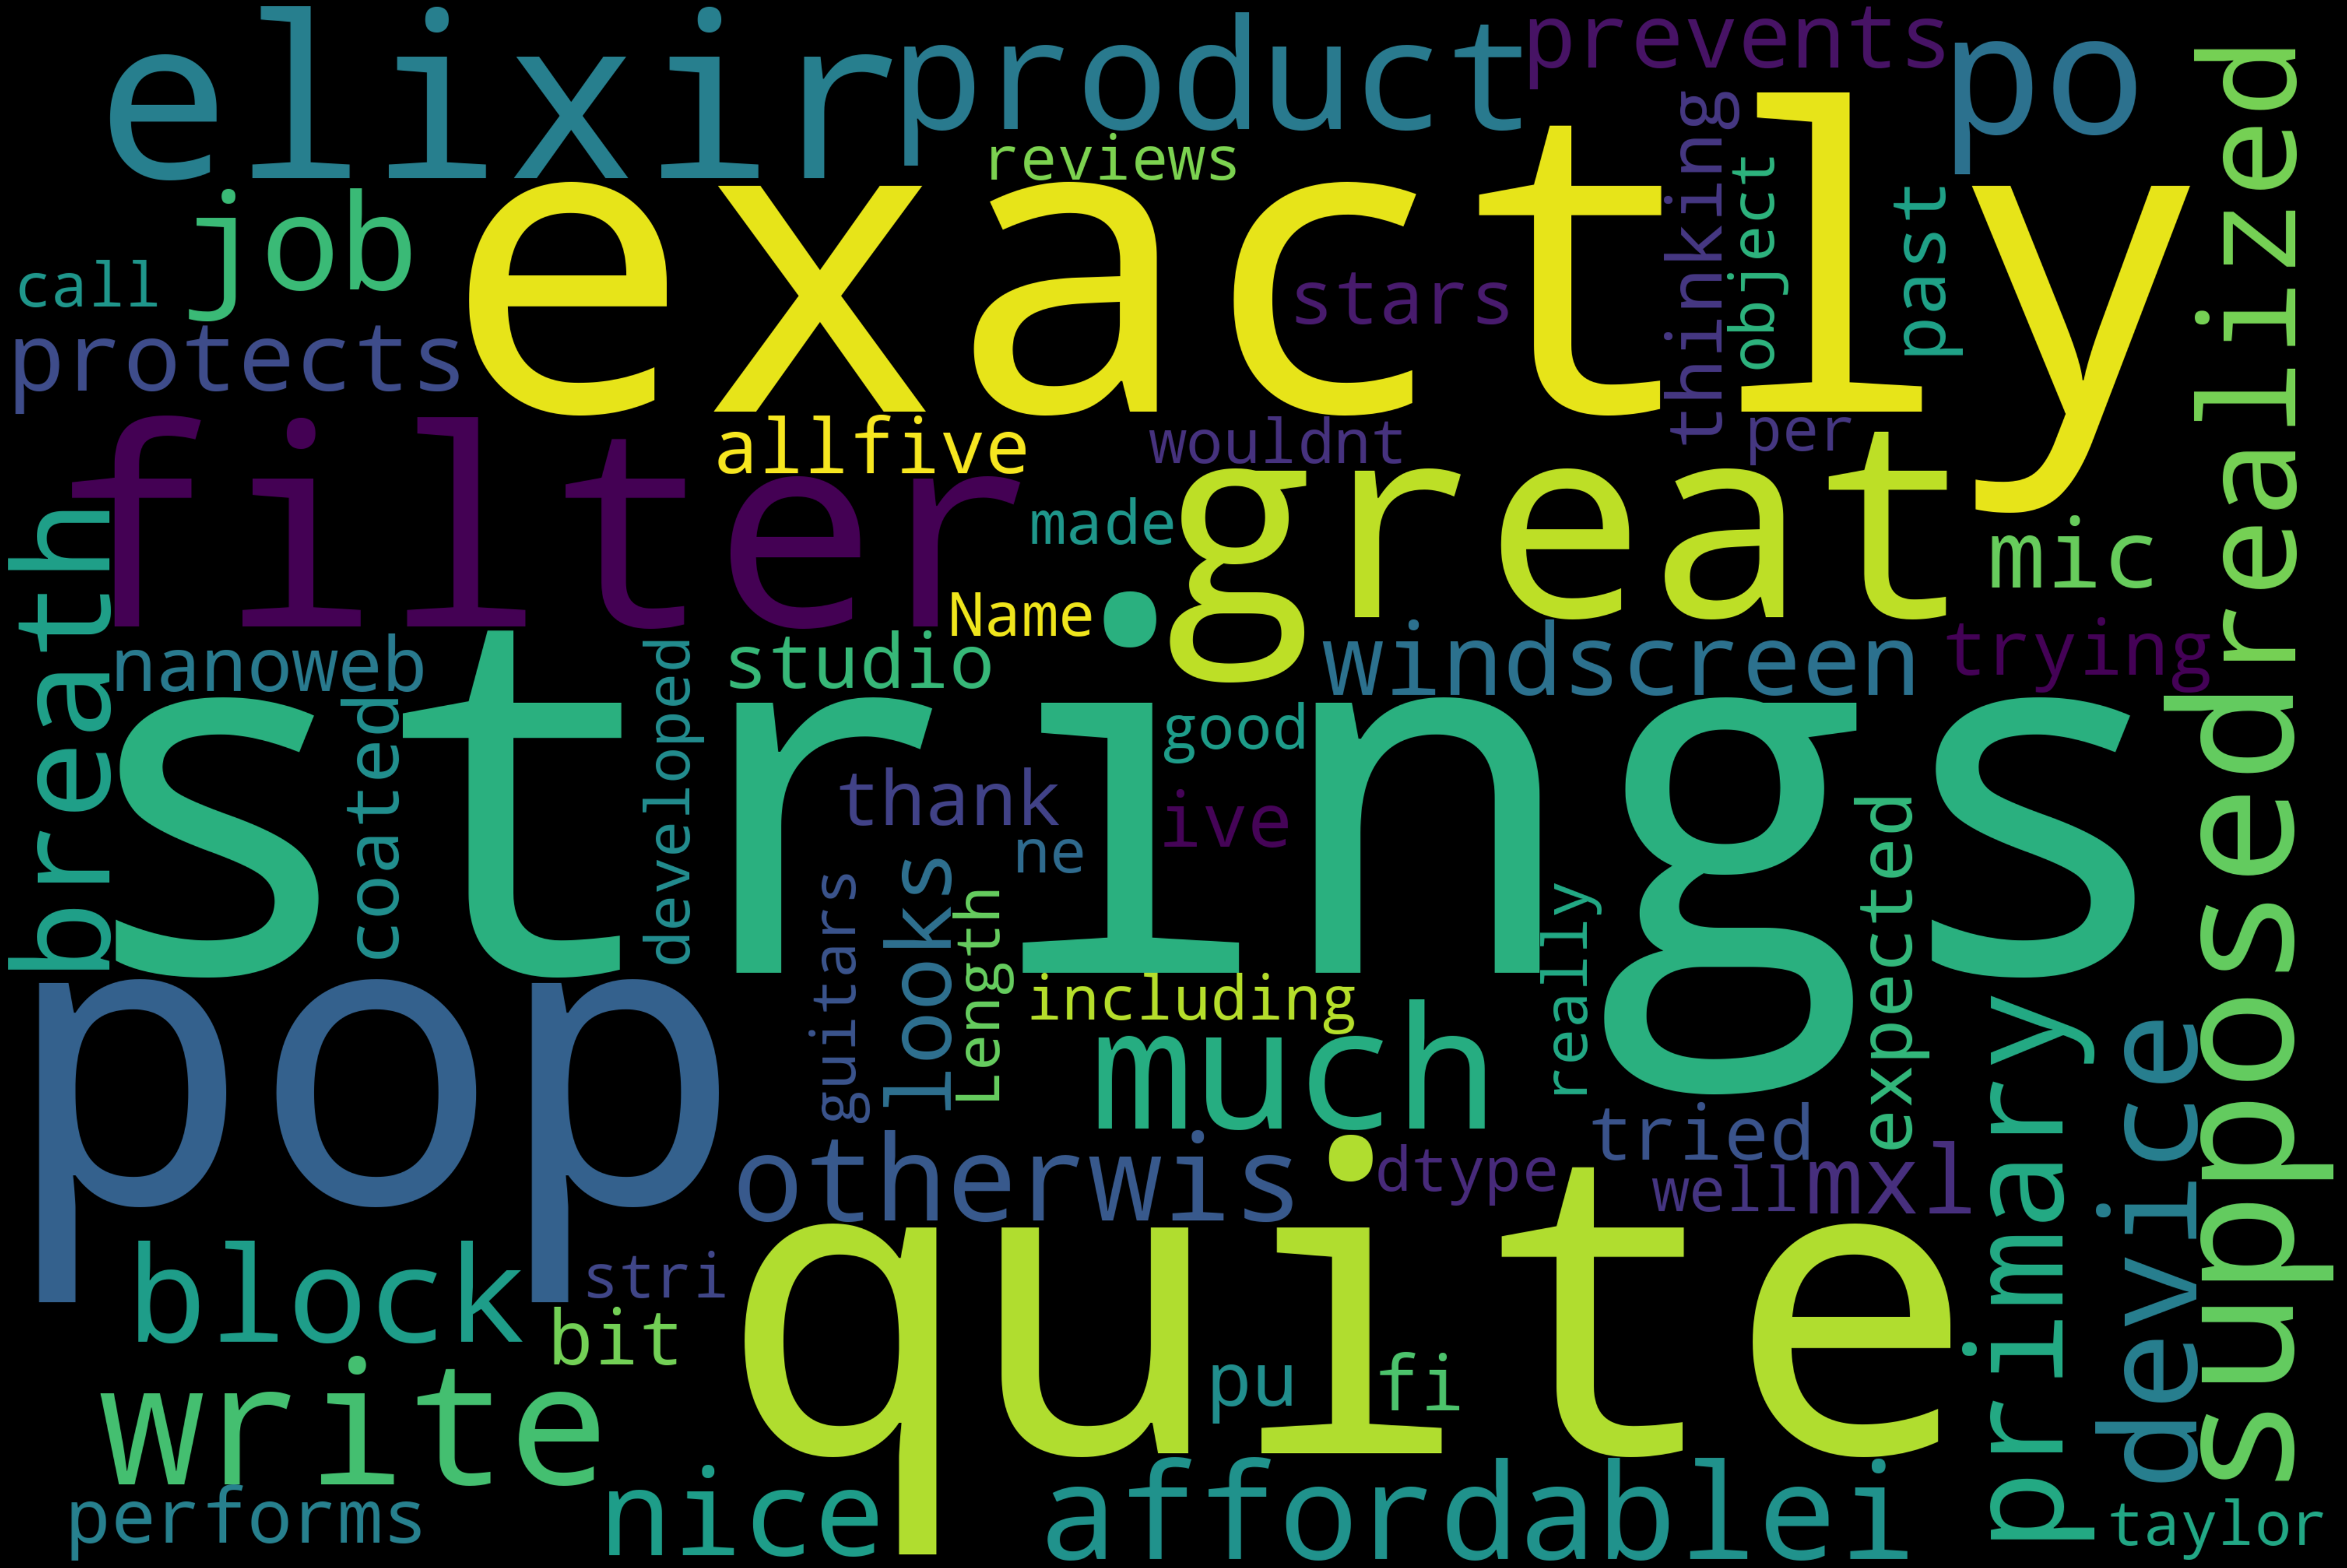

In [39]:
text = review_pos["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**We can see positive words like great, affordable, expected, exactly etc.**

## Wordcloud-Neutral reviews



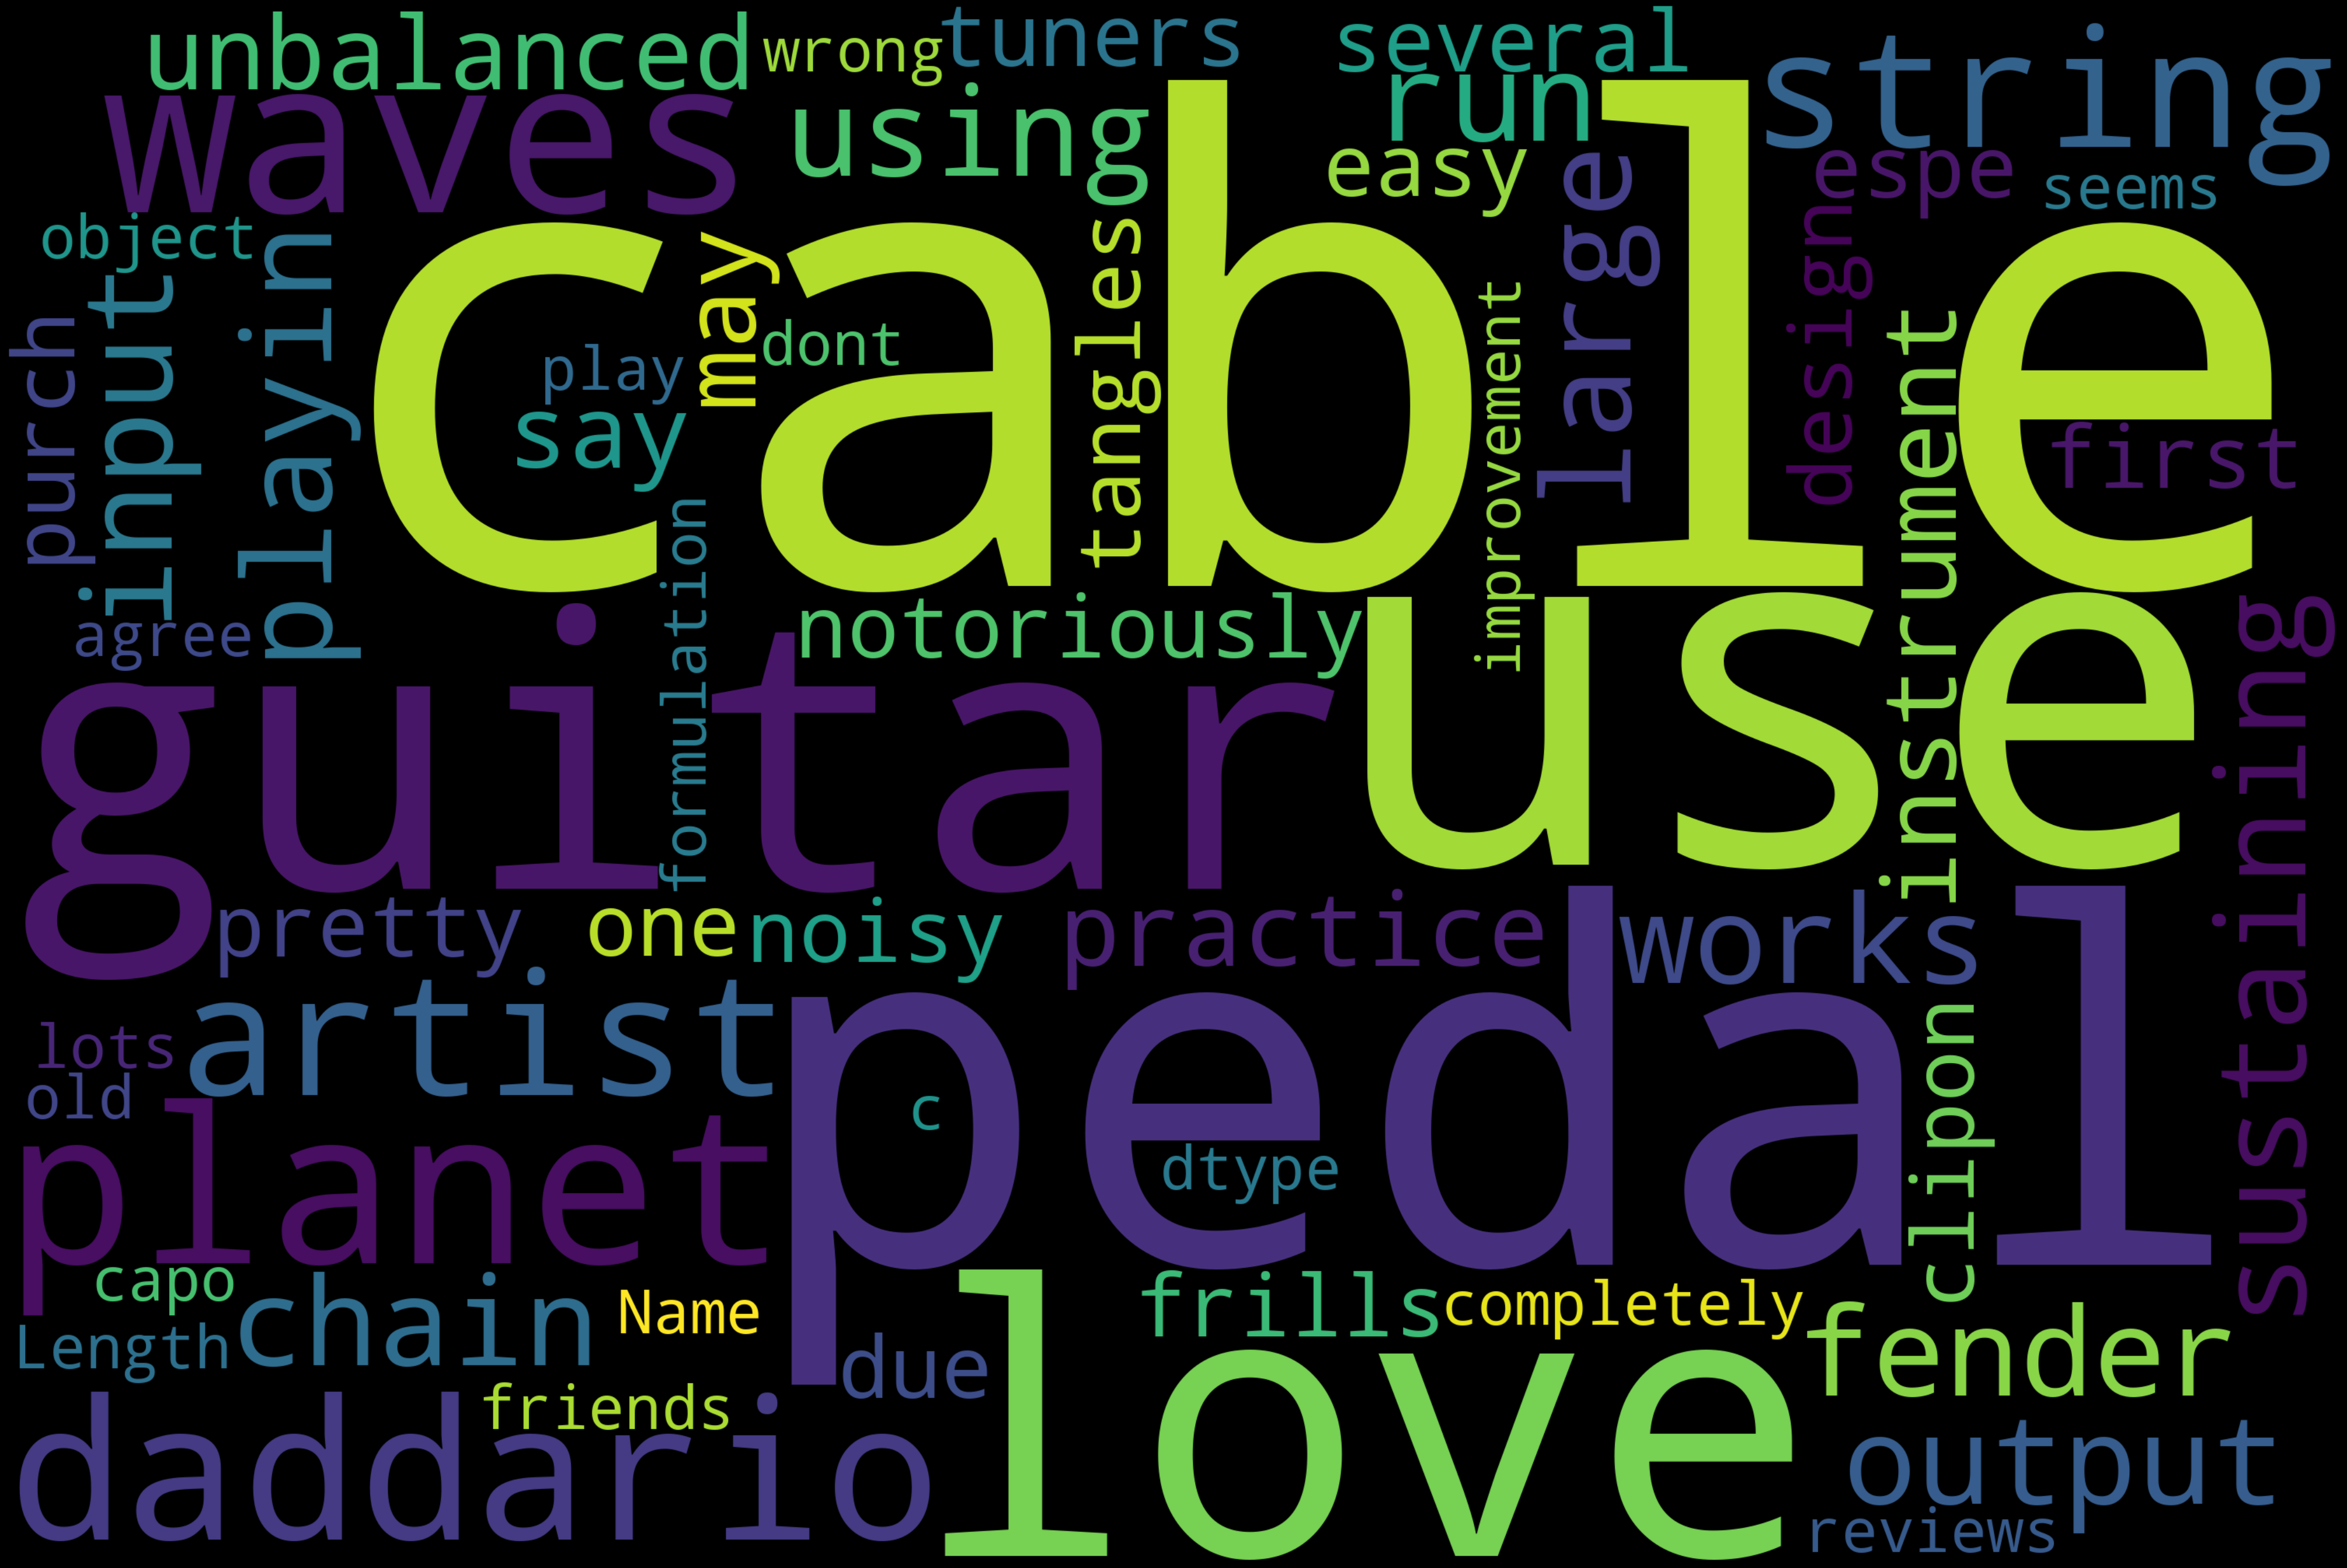

In [40]:
text = review_neu["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Most of the neutral review words are focussed on the products and how can they be improved.**

## Wordcloud-Negative reviews



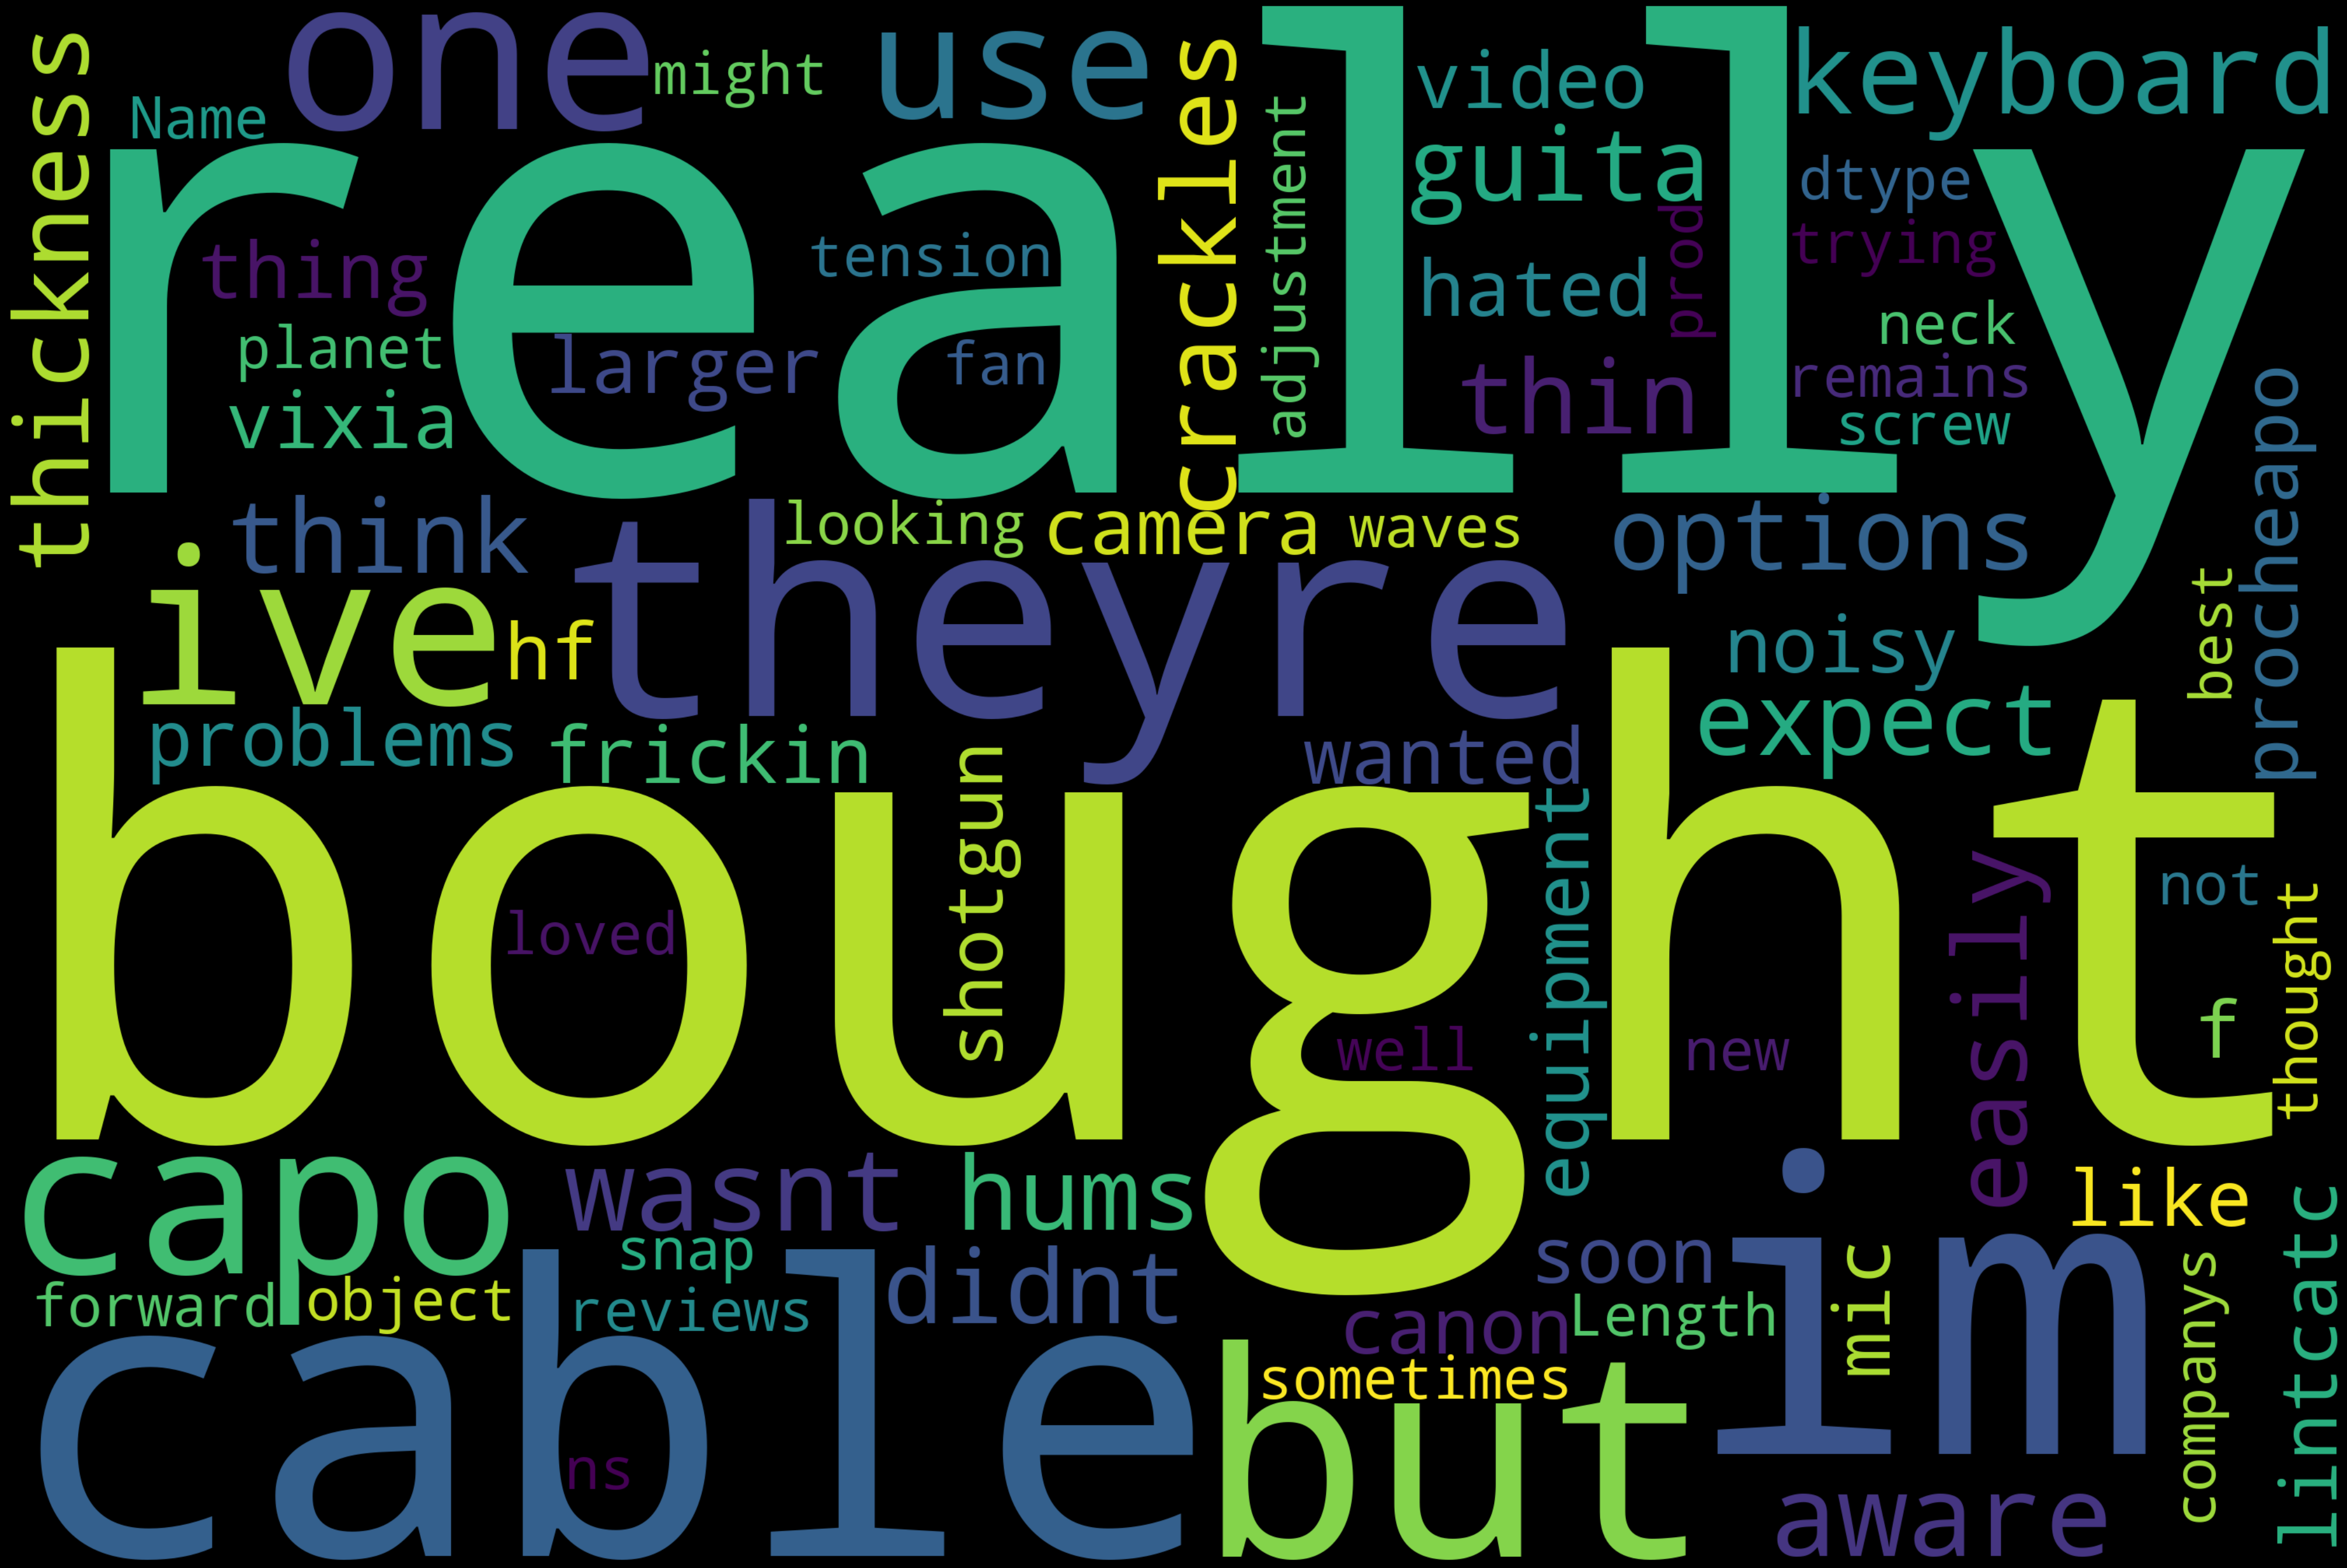

In [41]:
text = review_neg["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**We can see negative review words such as noisy, didnt, frickin, wasnt, snap, problems, tension etc.**

<a id="section-four"></a>
# Extracting Features from Cleaned reviews
**Before building the model for sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, I am going to use TF-TDF method to convert the texts**

## Encoding target variable-sentiment
Encoding target variable with Label encoder.

In [42]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
process_reviews['sentiment']= label_encoder.fit_transform(process_reviews['sentiment']) 
  
process_reviews['sentiment'].unique() 

array([2, 1, 0])

In [43]:
process_reviews['sentiment'].value_counts()

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64

## Stemming the reviews
**Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,**
* **Going->go**
* **Finally->fina**

**If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Simce it takes time. I'm using stemming**

In [44]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

reviews
0  not much write but exactly supposed filters po...
1  product exactly quite affordablei not realized...
2  primary job device block breath would otherwis...
3  nice windscreen protects mxl mic prevents pops...
4  pop filter great looks performs like studio fi...

In [45]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

In [46]:
corpus[3]

'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sagginggood windscreen money'

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it, I use TFIDF.

## TFIDF(Term Frequency — Inverse Document Frequency)
Splitting as bigram (two words) and consider their combined weight. Taking only the top 5000 words from the reviews.

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [48]:
X.shape

(10261, 5000)

**As I have considered 5000 words, I can confirm that we have 5000 columns from the shape.**

In [49]:
#Getting the target variable(encoded)
y=process_reviews['sentiment']

## Handling Imbalance target feature-SMOTE


In [50]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape Counter({2: 9022, 1: 9022, 0: 9022})


Great, as you can see the resampled data has equally distributed classes

## Train-test split(75:25)
Using train test split function I am splitting the dataset into 75:25 ratio for train and test set respectively.

In [51]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

<a id="section-five"></a>
# Model Building: Sentiment Analysis


In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model selection

First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process.

In [53]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8810059200798708
Decision Tree Test Accuracy: 0.8136645844840382
KNN Test Accuracy: 0.8791539733245264
SVC Test Accuracy: 0.8795439317757772
Naive Bayes Test Accuracy: 0.8038184420263036


**From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 80%. So, let's go with logistic regression with hyperparameter tuning.**

## Logistic Regression with Hyperparameter tuning
Using regularization parameter and penality for parameter tuning. Let's see which one to plug.

In [54]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(C=10000.0, random_state=0)
The mean accuracy of the model is: 0.9405940594059405


**From the selected params, we get accuracy. Let's plug and chug**

In [55]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


**We have got 94% accuracy. For classification problems we need to get confusion matrix and check f1 score rather than accuracy**

## Classification metrics
Plotting the confusion matrix with ROC and check our f1 score.

Confusion matrix, without normalization


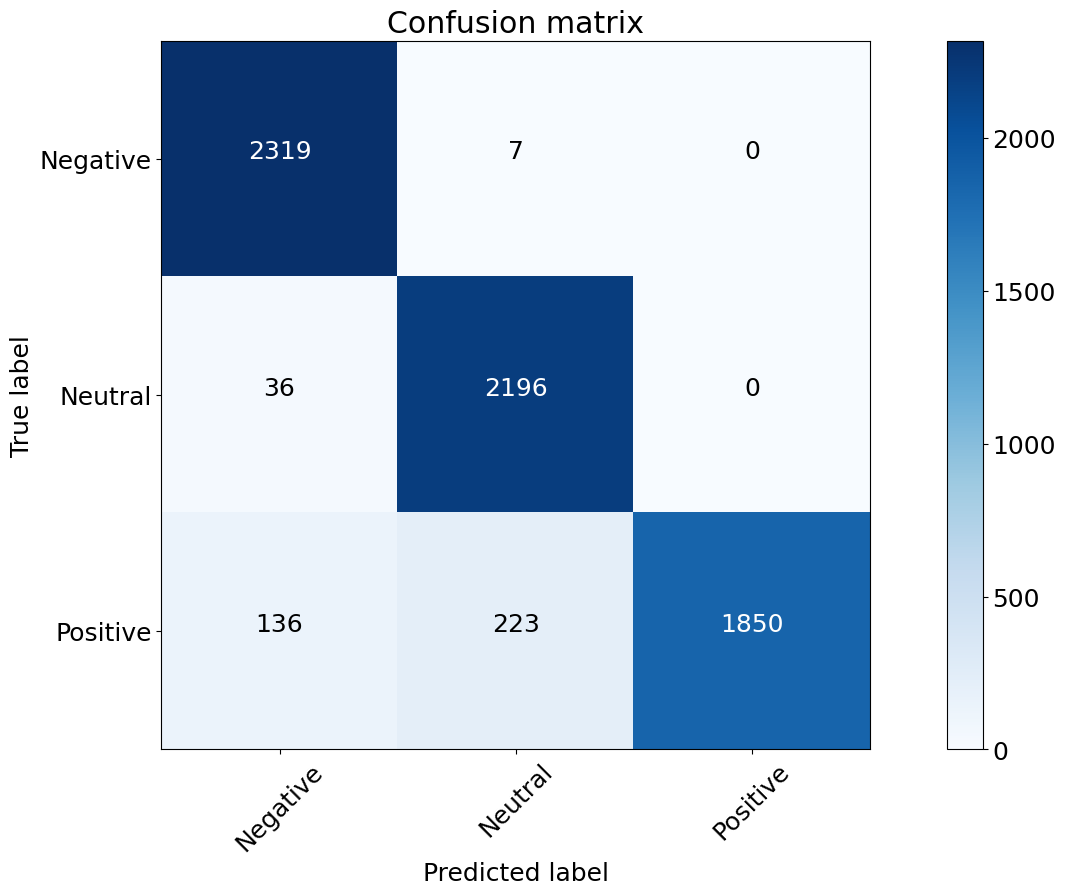

In [56]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

**Check out the diagonal elements(2326+2195+1854), they are correctly predicted records and rest are incorrectly classified by the algorithm**

In [57]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2326
           1       0.91      0.98      0.94      2232
           2       1.00      0.84      0.91      2209

    accuracy                           0.94      6767
   macro avg       0.95      0.94      0.94      6767
weighted avg       0.94      0.94      0.94      6767



**Since predicting both positive,negative and neutral reviews are important we are considering. We got a pretty good f1 score. As we see it got a good score across all classes classified.**

## ROC-AUC curve


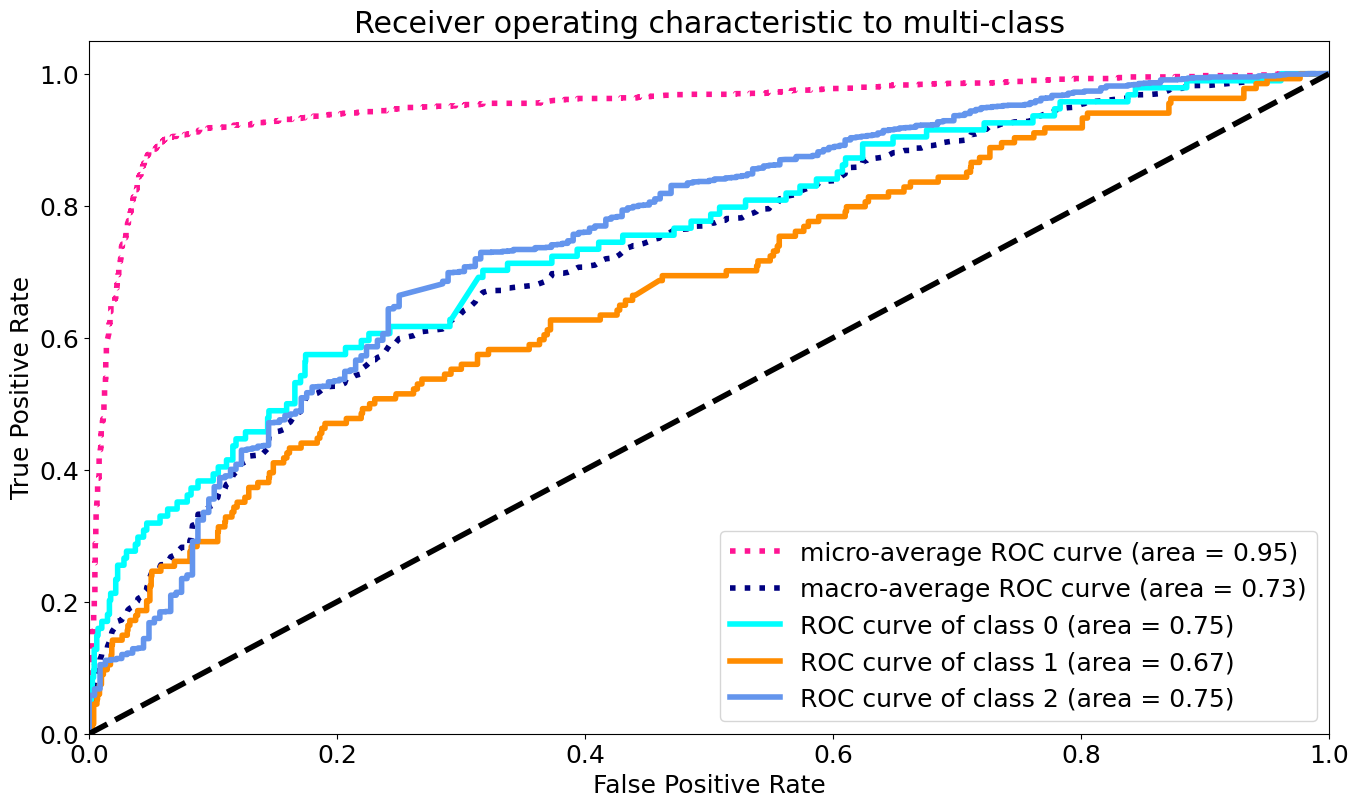

In [58]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

**Insights:**
* **Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR**
* **Coming to micro and macro average, micro average preforms really well and macro average shows a not very good score**
* **If you don't understand what micro and macro average is, just remember the following 'A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance'**